Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv',delimiter = ',', skipinitialspace=True)

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [4]:
columns_to_remove = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']

movies_df = movies_df.drop(columns=columns_to_remove)

#### Remove any duplicate rows

In [5]:
movies_df = movies_df.drop_duplicates()

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
movies_df = movies_df[movies_df['revenue'] != 0]
movies_df = movies_df[movies_df['budget'] != 0]

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [7]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [8]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [9]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [10]:
# Inspect flattened data
movies_df.sample(1)

budget                  genres     id  popularity  \
344  100000000  ['Action', 'Thriller']  44048   37.698465   

             production_countries release_date    revenue  runtime  \
344  ['United States of America']   2010-11-04  167805466     98.0   

    spoken_languages        title  vote_average  vote_count  release_year  
344      ['English']  Unstoppable           6.3        1165          2010

### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [11]:
# Create a dataframe with all the movies in the "Action" genre
def is_action_movie(genre_list):
    return 'Action' in genre_list

action_movies_df = movies_df[movies_df['genres'].apply(is_action_movie)]

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False)
most_expensive_movies.head()

budget                                             genres     id  \
17  380000000                 ['Adventure', 'Action', 'Fantasy']   1865   
1   300000000                 ['Adventure', 'Fantasy', 'Action']    285   
7   280000000         ['Action', 'Adventure', 'Science Fiction']  99861   
10  270000000  ['Adventure', 'Fantasy', 'Action', 'Science Fi...   1452   
6   260000000                            ['Animation', 'Family']  38757   

    popularity          production_countries release_date     revenue  \
17  135.413856  ['United States of America']   2011-05-14  1045713802   
1   139.082615  ['United States of America']   2007-05-19   961000000   
7   134.279229  ['United States of America']   2015-04-22  1405403694   
10   57.925623  ['United States of America']   2006-06-28   391081192   
6    48.681969  ['United States of America']   2010-11-24   591794936   

    runtime                    spoken_languages  \
17    136.0              ['English', 'Español']   
1     169.0                         ['English']   
7     141.0                         ['English']   
10    154.0  ['English', 'Français', 'Deutsch']   
6     100.0                         ['English']   

                                          title  vote_average  vote_count  \
17  Pirates of the Caribbean: On Stranger Tides           6.4        4948   
1      Pirates of the Caribbean: At World's End           6.9        4500   
7                       Avengers: Age of Ultron           7.3        6767   
10                             Superman Returns           5.4        1400   
6                                       Tangled           7.4        3330   

    release_year  
17          2011  
1           2007  
7           2015  
10          2006  
6           2010

In [13]:
cheapest_movies = movies_df.sort_values(by='budget', ascending=True)
cheapest_movies.head()

budget                                             genres     id  \
4238       1                                ['Drama', 'Comedy']   3082   
3611       4                        ['Drama', 'Romance', 'War']  22649   
3372       7  ['Thriller', 'Action', 'Horror', 'Science Fict...  13006   
3419       7          ['Comedy', 'Drama', 'Foreign', 'Romance']  38415   
4608       8                  ['Fantasy', 'Horror', 'Thriller']  11980   

      popularity          production_countries release_date  revenue  runtime  \
4238   28.276480  ['United States of America']   1936-02-05  8500000     87.0   
3611    1.199451  ['United States of America']   1932-12-08       25     89.0   
3372    4.857028            ['United Kingdom']   1992-05-01        5     90.0   
3419    0.050456                            []   2009-08-09        7     82.0   
4608   11.818333  ['United States of America']   1995-09-01       16     98.0   

     spoken_languages               title  vote_average  vote_count  \
4238      ['English']        Modern Times           8.1         856   
3611      ['English']  A Farewell to Arms           6.2          28   
3372      ['English']        Split Second           5.7          63   
3419               []        Bran Nue Dae           5.2           6   
4608      ['English']        The Prophecy           6.4         138   

      release_year  
4238          1936  
3611          1932  
3372          1992  
3419          2009  
4608          1995

We can see in the most expensive movies that higher budget typically leads to more revenue, while the cheapest movies tends to get lower revenue, with the exception of the movie "Modern Times"
All the expensive movies tend to be popular even if they are badly rated and get huge vote counts, but not necessarily a good vote average while the cheaper movies get almost no popularity with low vote count, but the vote average looks rather the same


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [15]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
min_profit = movies_df['profit'].min()
max_profit = movies_df['profit'].max()
min_profit_movie = movies_df[movies_df['profit'] == min_profit]
max_profit_movie = movies_df[movies_df['profit'] == max_profit]
moat_profitable_movies = movies_df.sort_values(by='profit', ascending=False)
moat_profitable_movies.head()

budget                                             genres      id  \
0   237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
25  200000000                   ['Drama', 'Romance', 'Thriller']     597   
28  150000000  ['Action', 'Adventure', 'Science Fiction', 'Th...  135397   
44  190000000                                         ['Action']  168259   
16  220000000         ['Science Fiction', 'Action', 'Adventure']   24428   

    popularity                            production_countries release_date  \
0   150.437577  ['United States of America', 'United Kingdom']   2009-12-10   
25  100.025899                    ['United States of America']   1997-11-18   
28  418.708552                    ['United States of America']   2015-06-09   
44  102.322217           ['Japan', 'United States of America']   2015-04-01   
16  144.448633                    ['United States of America']   2012-04-25   

       revenue  runtime                                   spoken_languages  \
0   2787965087    162.0                             ['English', 'Español']   
25  1845034188    194.0  ['English', 'Français', 'Deutsch', 'svenska', ...   
28  1513528810    124.0                                        ['English']   
44  1506249360    137.0                                        ['English']   
16  1519557910    143.0                                        ['English']   

             title  vote_average  vote_count  release_year      profit  
0           Avatar           7.2       11800          2009  2550965087  
25         Titanic           7.5        7562          1997  1645034188  
28  Jurassic World           6.5        8662          2015  1363528810  
44       Furious 7           7.3        4176          2015  1316249360  
16    The Avengers           7.4       11776          2012  1299557910

In [16]:
min_profit_movie

budget                              genres     id  popularity  \
13  255000000  ['Action', 'Adventure', 'Western']  57201   49.046956   

            production_countries release_date   revenue  runtime  \
13  ['United States of America']   2013-07-03  89289910    149.0   

   spoken_languages            title  vote_average  vote_count  release_year  \
13      ['English']  The Lone Ranger           5.9        2311          2013   

       profit  
13 -165710090

In [17]:
max_profit_movie

budget                                             genres     id  \
0  237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...  19995   

   popularity                            production_countries release_date  \
0  150.437577  ['United States of America', 'United Kingdom']   2009-12-10   

      revenue  runtime        spoken_languages   title  vote_average  \
0  2787965087    162.0  ['English', 'Español']  Avatar           7.2   

   vote_count  release_year      profit  
0       11800          2009  2550965087

We can see that the movie with the highest profit was a hit in popularity because of how well it performed, getting a high vote average while the movie with the lowest profit had a significantly lower popularity and vote average

Text(0, 0.5, 'Profit')

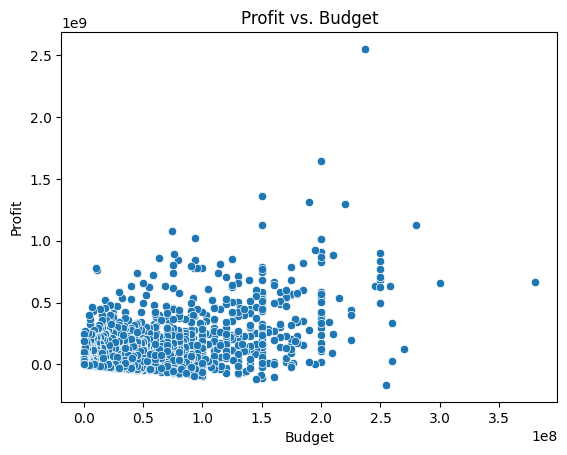

In [30]:
sns.scatterplot(x='budget', y='profit', data=movies_df)
plt.title('Profit vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')

We can see that there is a positive correlation between a movie’s profit and budget, meaning that the more budget a movie has, the more likely it is to generate more profit. 

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [18]:
popular_movies = movies_df.sort_values(by='popularity', ascending=False)
popular_movies.head()

budget                                             genres      id  \
546   74000000     ['Family', 'Animation', 'Adventure', 'Comedy']  211672   
95   165000000          ['Adventure', 'Drama', 'Science Fiction']  157336   
788   58000000                  ['Action', 'Adventure', 'Comedy']  293660   
94   170000000         ['Action', 'Science Fiction', 'Adventure']  118340   
127  150000000  ['Action', 'Adventure', 'Science Fiction', 'Th...   76341   

     popularity                               production_countries  \
546  875.581305                       ['United States of America']   
95   724.247784  ['Canada', 'United States of America', 'United...   
788  514.569956                       ['United States of America']   
94   481.098624     ['United Kingdom', 'United States of America']   
127  434.278564          ['Australia', 'United States of America']   

    release_date     revenue  runtime spoken_languages  \
546   2015-06-17  1156730962     91.0      ['English']   
95    2014-11-05   675120017    169.0      ['English']   
788   2016-02-09   783112979    108.0      ['English']   
94    2014-07-30   773328629    121.0      ['English']   
127   2015-05-13   378858340    120.0      ['English']   

                       title  vote_average  vote_count  release_year  \
546                  Minions           6.4        4571          2015   
95              Interstellar           8.1       10867          2014   
788                 Deadpool           7.4       10995          2016   
94   Guardians of the Galaxy           7.9        9742          2014   
127       Mad Max: Fury Road           7.2        9427          2015   

         profit  
546  1082730962  
95    510120017  
788   725112979  
94    603328629  
127   228858340

Text(0, 0.5, 'popularity')

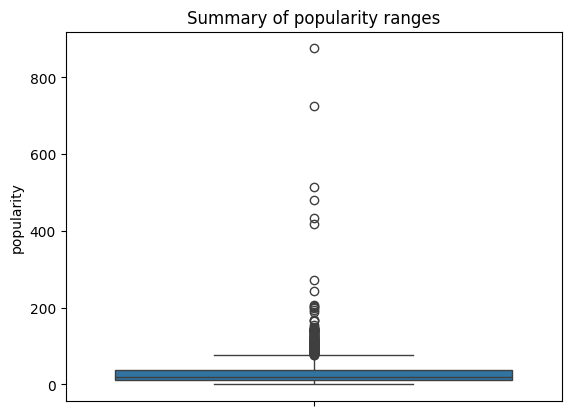

In [34]:
sns.boxplot(y='popularity', data=movies_df)
plt.title('Summary of popularity ranges')
plt.ylabel('popularity')

The majority of movies in the dataset have a very low popularity score, being between roughly 10 and 40. However, there are a significant number of outliers with movies that are considerably more popular than the average movie in this dataset, with some of them reaching up to nearly 900.

#### Find Movies which are rated above 7

In [19]:
well_rated_movies = movies_df[movies_df['vote_average'] > 7]
well_rated_movies.sample()

budget                             genres      id  popularity  \
2167  20000000  ['Mystery', 'Adventure', 'Crime']  328387   62.933899   

              production_countries release_date   revenue  runtime  \
2167  ['United States of America']   2016-07-27  83707310     96.0   

     spoken_languages  title  vote_average  vote_count  release_year    profit  
2167      ['English']  Nerve           7.1        2181          2016  63707310

Text(0, 0.5, 'Vote average')

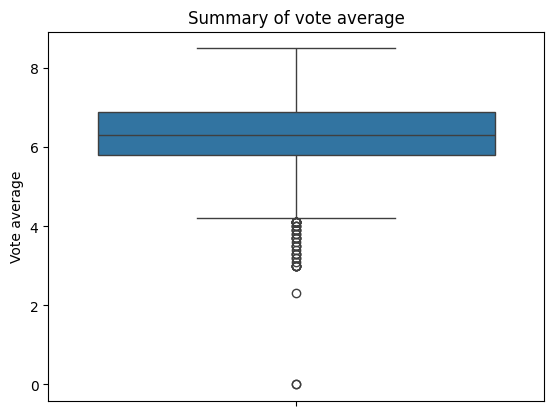

In [25]:
sns.boxplot(y='vote_average', data=movies_df)
plt.title('Summary of vote average')
plt.ylabel('Vote average')

The majority of movie voted average in the dataset fall within the ranges of roughly 7 to 6, , but there are alot more low average outliers, going down to around a rating of 2.

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

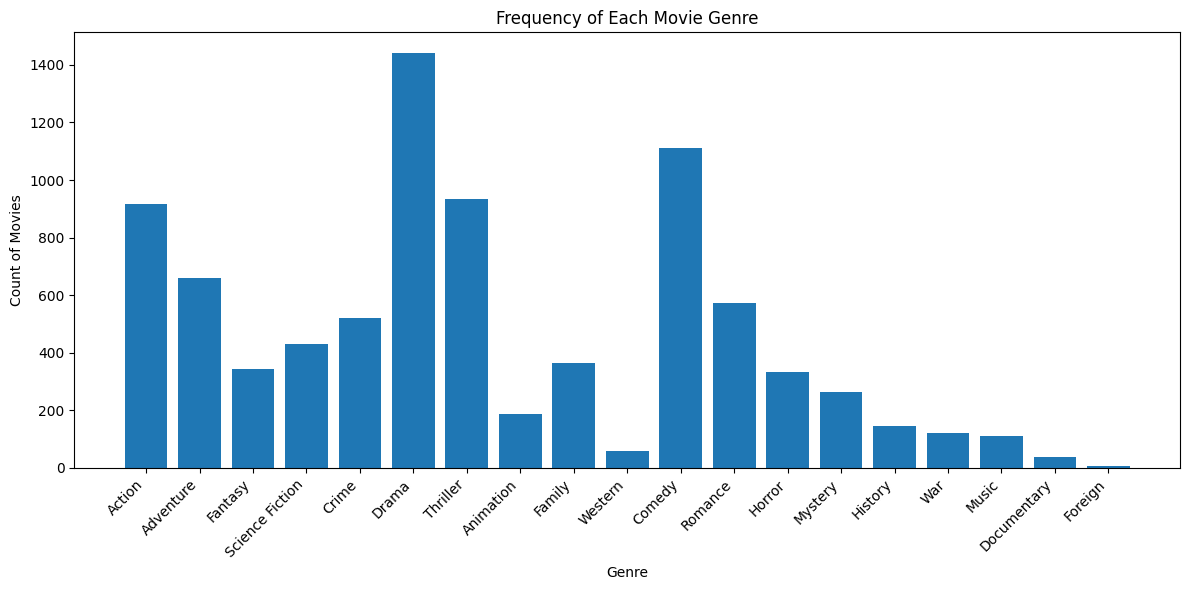

In [20]:
genres_list = []

for genres in movies_df['genres']:
    genres_list.append(genres)

genres_2dlist = [ast.literal_eval(string_list) for string_list in genres_list]

genres_dict = {}

for genres in genres_2dlist:
    for genre in genres:
        if genre in genres_dict:
            genres_dict[genre] += 1
        else:
            genres_dict[genre] = 1

plt.figure(figsize=(12, 6))
plt.bar(genres_dict.keys(), genres_dict.values())
plt.title('Frequency of Each Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

We can see that most movies fall under the following categories: Drama, Action, Thriller and Comedy. 

Text(0.5, 1.0, 'Relationship between Budget and Revenue')

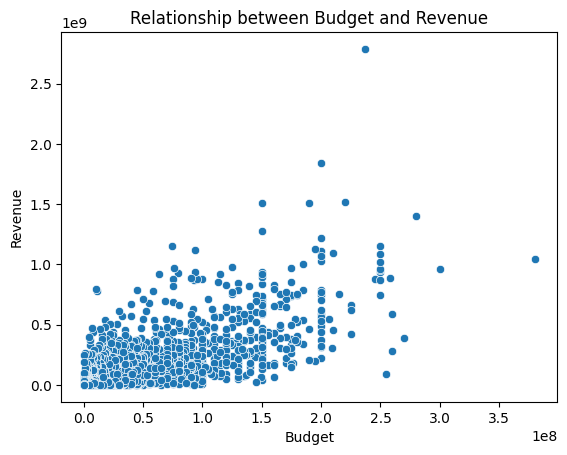

In [21]:
sns.scatterplot(x='budget', y='revenue', data=movies_df)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship between Budget and Revenue')

It is safe to say that there is a positive correlation between a movie’s revenue and budget, meaning that the more budget a movie has, the more likely it is to generate more revenue. 

Text(0, 0.5, 'Count of movies')

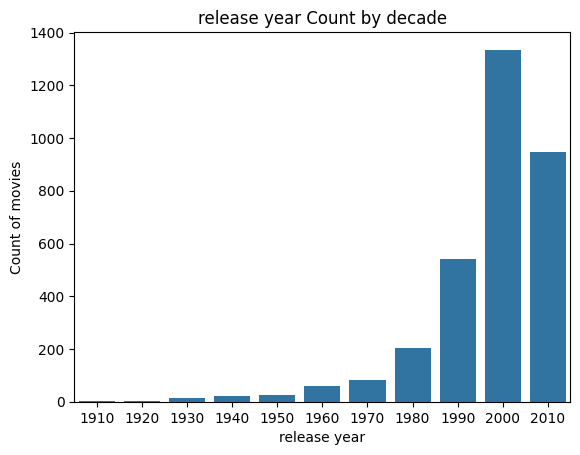

In [22]:
movies_df['decade'] = (movies_df['release_year'] // 10) * 10

sns.countplot(x='decade', data=movies_df)
plt.title('release year Count by decade')
plt.xlabel('release year')
plt.ylabel('Count of movies')

From the 1980’s to the 1990’s the production of movies increased by over 100 percent and from the 1990’s to the 2000’s it increased by a further 100 percent.

Text(0, 0.5, 'Frequency')

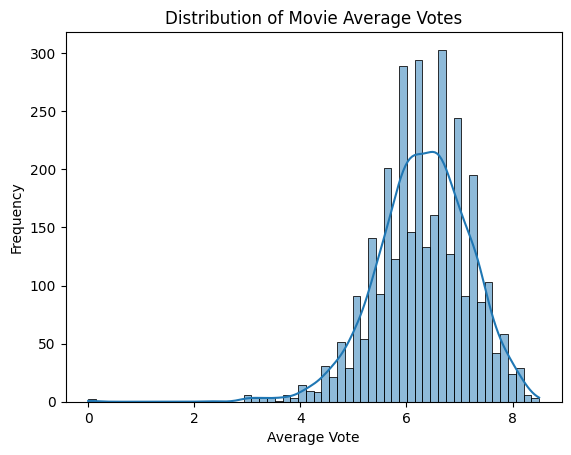

In [23]:
sns.histplot(x='vote_average', data=movies_df, kde=True)
plt.title('Distribution of Movie Average Votes')
plt.xlabel('Average Vote')
plt.ylabel('Frequency')

It seems that most movie ratings fall between the range of 4 to 8 out of 10, being normally distributed.